### Datasource URL : https://www.kaggle.com/datasets/giripujar/hr-analytics?resource=download

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./dataset/HR_comma_sep.csv')

## Exploratory Analysis

In [62]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [63]:
df.shape

(14999, 10)

In [64]:
tmp_df = df.drop(columns=['Department', 'salary'])
tmp_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [65]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

### Satisfaction Level vs Retention



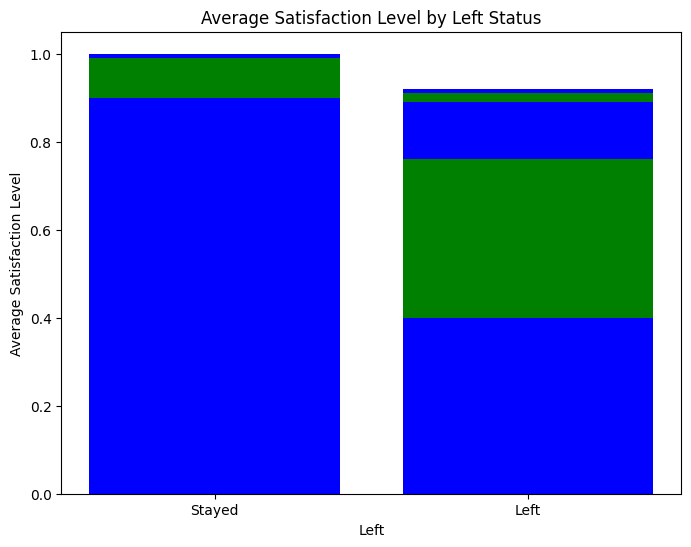

In [66]:
plt.figure(figsize=(8, 6))
plt.bar(df['left'], df['satisfaction_level'], color=['blue', 'green'])
plt.xlabel('Left')
plt.ylabel('Average Satisfaction Level')
plt.title('Average Satisfaction Level by Left Status')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

In [67]:
plt.show()

In [68]:
# plt.scatter([df['left'], df['satisfaction_level']])
df[['left', 'satisfaction_level']]



,left,satisfaction_level
0,1,0.38
1,1,0.80
2,1,0.11
3,1,0.72
4,1,0.37
...,...,...
14994,1,0.40
14995,1,0.37
14996,1,0.37
14997,1,0.11


In [69]:
test1 = df[['left', 'satisfaction_level']]

In [70]:
sl_avg = df['satisfaction_level'].mean()

In [71]:
sl_avg

0.6128335222348156

## Impact of salary over retention

In [72]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [73]:
salary_left_df = df[['salary', 'left']]

In [74]:
salary_left_df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

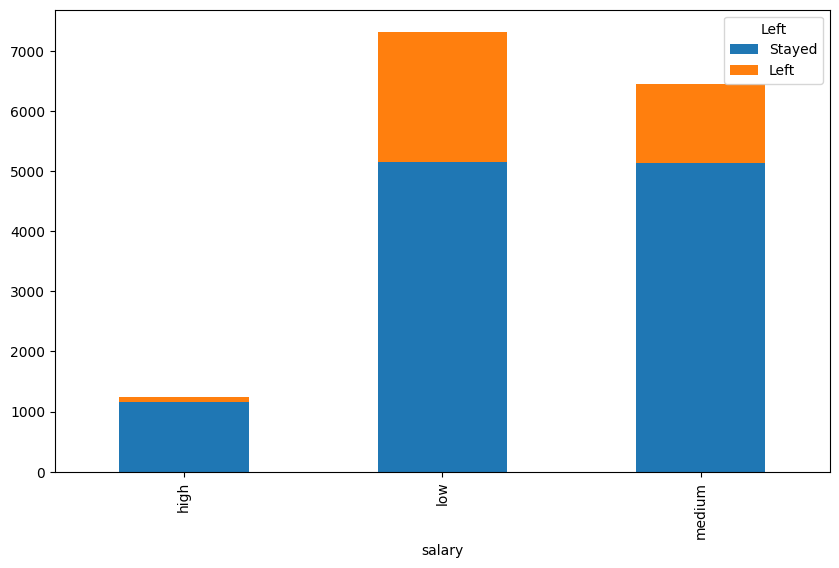

In [75]:
grouped_data = salary_left_df.groupby(['salary', 'left']).size().unstack()
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

In [76]:
# Filter the Data

low_salary = salary_left_df[(salary_left_df['salary']=='low') & (salary_left_df['left']== 1)].count()
low_salary

salary    2172
left      2172
dtype: int64

In [77]:
# low_salary[low_salary['left']==1]

## Department vs Employee Retention

In [78]:
df['Department'].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

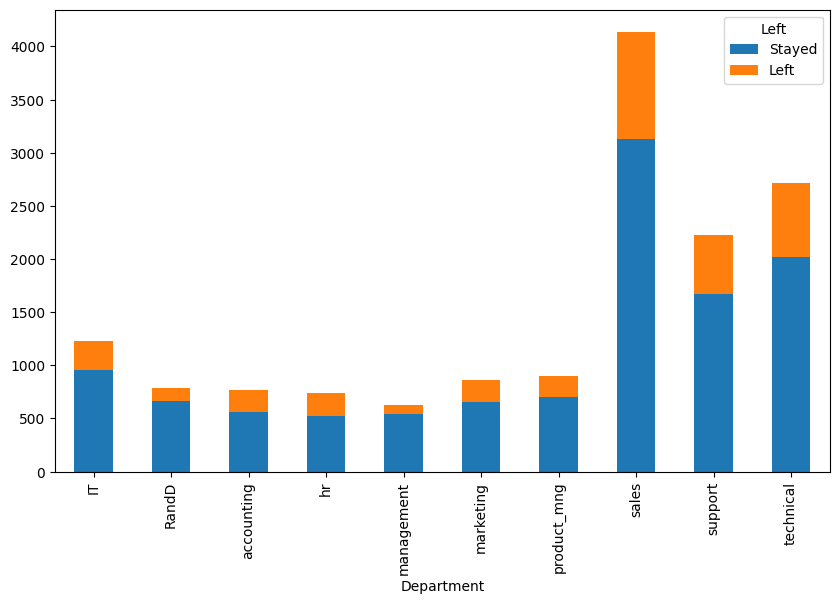

In [79]:
grouped_data = df.groupby(['Department', 'left']).size().unstack()
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

In [88]:
tmp_df = tmp_df.join(df['salary'])

In [92]:
salary_dummies = pd.get_dummies(tmp_df['salary'], prefix='salary')
salary_dummies

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [93]:
df_with_dummies = pd.concat([tmp_df,salary_dummies],axis='columns')

In [103]:
df_with_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,True,False


In [105]:
# Now we need to drop salary coloumn
# df_with_dummies.drop('salary', axis = 'columns', inplace = True)
df_with_dummies.drop('left', axis = 'columns', inplace = True)
df_with_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,True
3,0.72,0.87,5,223,5,0,0,False,True,False
4,0.37,0.52,2,159,3,0,0,False,True,False


In [106]:
X = df_with_dummies
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,True
3,0.72,0.87,5,223,5,0,0,False,True,False
4,0.37,0.52,2,159,3,0,0,False,True,False


In [107]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3)

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [110]:
model.fit(X, y)

C:\Users\siddharth.sp\Desktop\Learn2Live\data science\data analytics\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [115]:
model.score(X_test, y_test)

0.7904761904761904

### Precision Score 

In [124]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_true  = y_test
y_pred = model.predict(X_test)
precision = precision_score(y_true, y_pred)
precision

0.5930232558139535

### Recall Score

In [125]:
recall = recall_score(y_true, y_pred)
recall


0.35072815533980584

### F1 Score

In [126]:
f1 = f1_score(y_true, y_pred)
f1

0.4407727503812913